In [80]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from statsmodels.multivariate.cancorr import CanCorr

In [5]:
uscereal = pd.read_csv(r'data_set/uscereal.csv', index_col=0)
uscereal

,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins
100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched
All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched
All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched
Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched
Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched
...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,146.66667,2.666667,1.333333,333.33333,0.000000,28.00000,4.000000,3,80.00000,enriched
Trix,G,110.00000,1.000000,1.000000,140.00000,0.000000,13.00000,12.000000,2,25.00000,enriched
Wheat Chex,R,149.25373,4.477612,1.492537,343.28358,4.477612,25.37313,4.477612,1,171.64179,enriched
Wheaties,G,100.00000,3.000000,1.000000,200.00000,3.000000,17.00000,3.000000,1,110.00000,enriched


In [8]:
uscereal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 100% Bran to Wheaties Honey Gold
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mfr        65 non-null     object 
 1   calories   65 non-null     float64
 2   protein    65 non-null     float64
 3   fat        65 non-null     float64
 4   sodium     65 non-null     float64
 5   fibre      65 non-null     float64
 6   carbo      65 non-null     float64
 7   sugars     65 non-null     float64
 8   shelf      65 non-null     int64  
 9   potassium  65 non-null     float64
 10  vitamins   65 non-null     object 
dtypes: float64(8), int64(1), object(2)
memory usage: 6.1+ KB


In [9]:
uscereal.groupby('shelf')[['calories', 'fat', 'sugars']].mean()

,calories,fat,sugars
shelf,,,
1,119.477431,0.662134,6.295493
2,129.816197,1.341349,12.507670
3,180.146602,1.944907,10.856821


In [10]:
# 协方差计算及其作用
# 计算 两组观测值与两组均值差值的乘积之和，除n - 1
# 作用：
# 1）描述两个变量的关系，正的协方差表示当一个变量增加时，另一个变量也增加，负的协方差表示当一个变量增加时，另一个变量减少，协方差接近于0则表示两个变量之间没有线性关系
# 2）多元分析中，帮助理解数据的方差和各个变量之间额相关性
uscereal[['calories', 'fat', 'sugars']].cov()

,calories,fat,sugars
calories,3895.242099,60.674383,180.380317
fat,60.674383,2.713399,3.995474
sugars,180.380317,3.995474,34.050018


In [17]:
uscereal_manova = MANOVA.from_formula('calories + fat + sugars ~ shelf', data=uscereal)
uscereal_manova

In [19]:
# wilks' lambda 
#   1）衡量所有因变量的 解释变异 与 未解释变异 的比值
#   2）用于检验 组间差异 是否显著，lambda值越小，表明组间差异越大， 
#   3）对与小于1的值表明自变量之间的变异与因变量的变异有一定关系
#   4）对应的p值用于检验自变量是否对应变量联合分布有显著影响
# pillai's Trace 
#   1）另一种常用的测试统计量，与wilk's lambda类似，用于判断因子对变量组的整体影响
#   2）其值越大，表示自变量对因变量的联合影响越显著
#   3）对应的p值用于检验自变量是否对应变量联合分布有显著影响
# Hotelling-Lawley Trace 评估组间差异显著性的一种统计量
# Roy's Greatest Root 测试最大特征值的统计量
print(uscereal_manova.mv_test())

# 

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.7091 3.0000 61.0000  8.3412 0.0001
         Pillai's trace 0.2909 3.0000 61.0000  8.3412 0.0001
 Hotelling-Lawley trace 0.4102 3.0000 61.0000  8.3412 0.0001
    Roy's greatest root 0.4102 3.0000 61.0000  8.3412 0.0001
------------------------------------------------------------
                                                            
------------------------------------------------------------
         shelf          Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.8041 3.0000 61.0000  4.9550 0.0038
         Pillai's trace 0.1959 3.0000 61.0000  4.9550 0.0038
 Hotelling-Lawley trace 0.2437 3.0000 61.0

In [37]:
uscereal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 100% Bran to Wheaties Honey Gold
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mfr        65 non-null     object 
 1   calories   65 non-null     float64
 2   protein    65 non-null     float64
 3   fat        65 non-null     float64
 4   sodium     65 non-null     float64
 5   fibre      65 non-null     float64
 6   carbo      65 non-null     float64
 7   sugars     65 non-null     float64
 8   shelf      65 non-null     int64  
 9   potassium  65 non-null     float64
 10  vitamins   65 non-null     object 
dtypes: float64(8), int64(1), object(2)
memory usage: 8.1+ KB


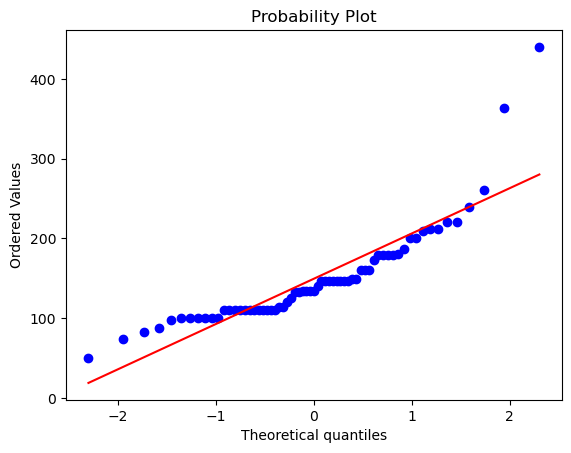

0.8054514696166146 7.751004681238032e-08


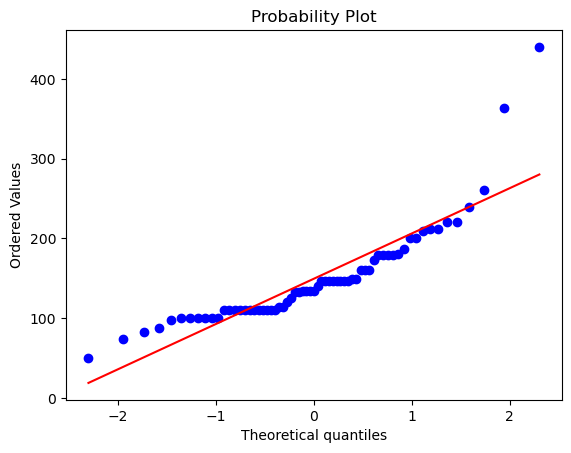

0.8324971760470683 4.2751112547239244e-07


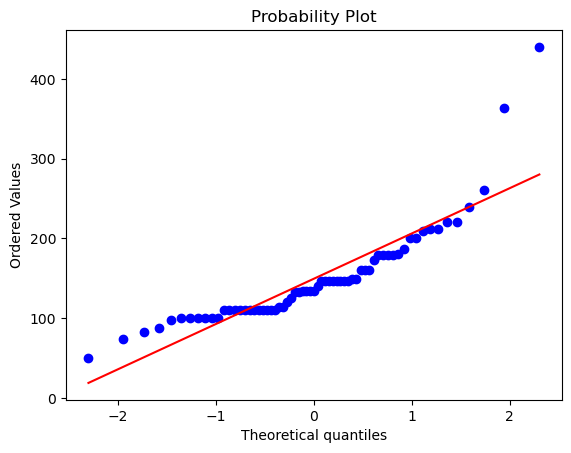

0.7823740722551351 2.0184369200991934e-08


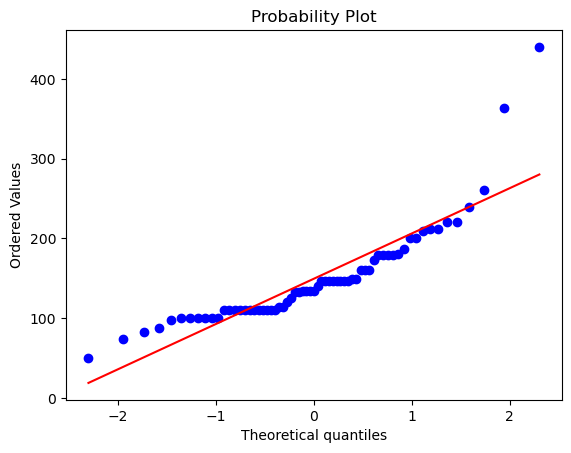

0.8615686451741337 3.247745592574226e-06


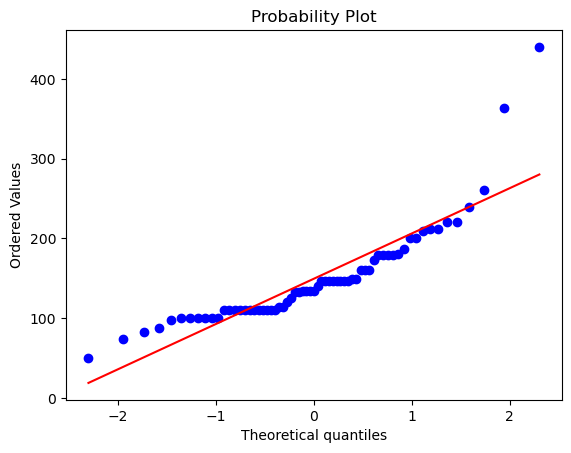

0.5984589139365754 4.6926928698127996e-12


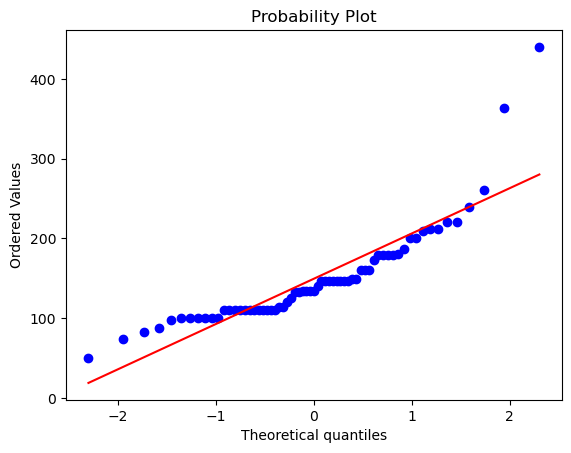

0.7506875998022778 3.6564593305534977e-09


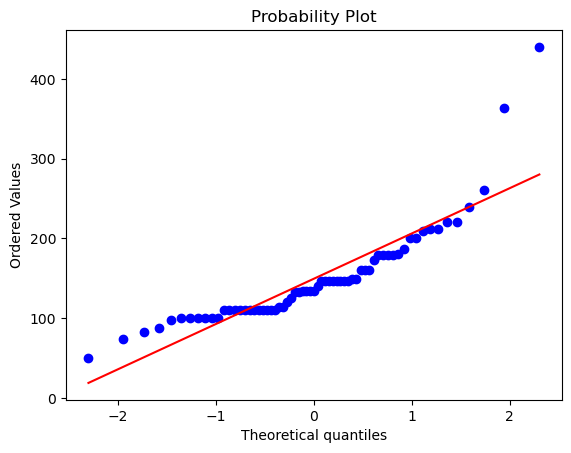

0.9402116776899649 0.0035558657623868165


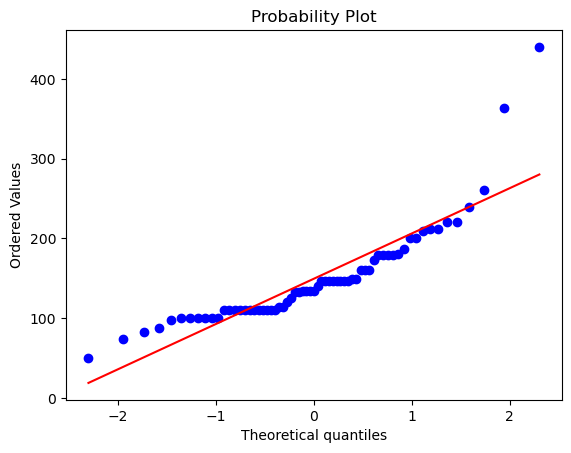

0.7675641468816895 8.917149053544171e-09


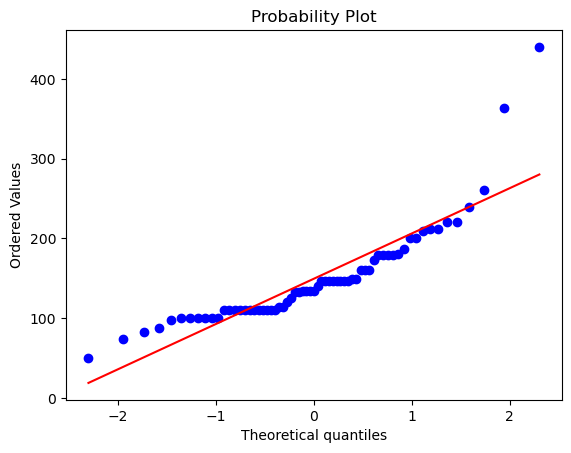

0.6996174697815465 3.0639812800629784e-10


In [60]:
# 评估假设检验
# 1、正态性（多元正态性）
# qqplot
# sm.qqplot()
# shapiro-wilk

for col in uscereal.columns:
    if uscereal.loc[:, col].dtype == 'object':
        continue
    else:
        stats.probplot(uscereal.loc[:, 'calories'].to_numpy(), dist='norm', plot=plt)
        plt.show()
        t_statistics, p_value = stats.shapiro(uscereal[col].to_numpy())
        print(t_statistics, p_value)

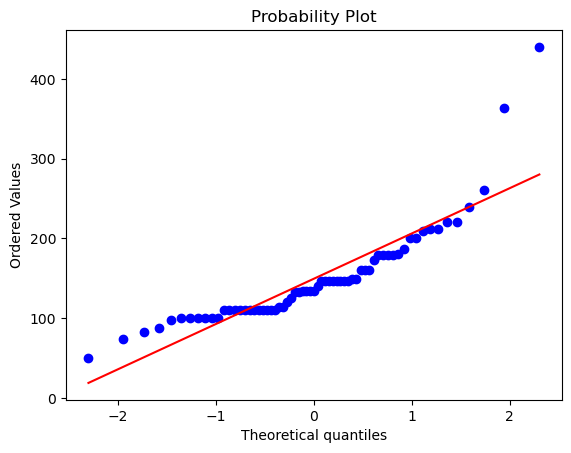

In [59]:
stats.probplot(uscereal.loc[:, 'calories'].to_numpy(), dist='norm', plot=plt)
plt.show()

In [64]:
# 2、同方差性
# 1、方差同质性
groups = []

for col in uscereal.columns:
    if uscereal.loc[:, col].dtype == 'object':
        continue
    else:
        groups.append(uscereal.loc[:, col])

print(stats.levene(*groups))

LeveneResult(statistic=29.438246914513577, pvalue=1.3611280340050042e-38)


In [ ]:
# 2、协方差同质性 -- 不明白如何实现
